<a href="https://colab.research.google.com/github/PVGs-AI-Club/TE-Resources/blob/main/Regression_Tutorial_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

In [ ]:
raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', delimiter=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.head(20)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [ ]:
 dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.head(20)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,0,0,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,0,0,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,0,0,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,0,0,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,0,0,1


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

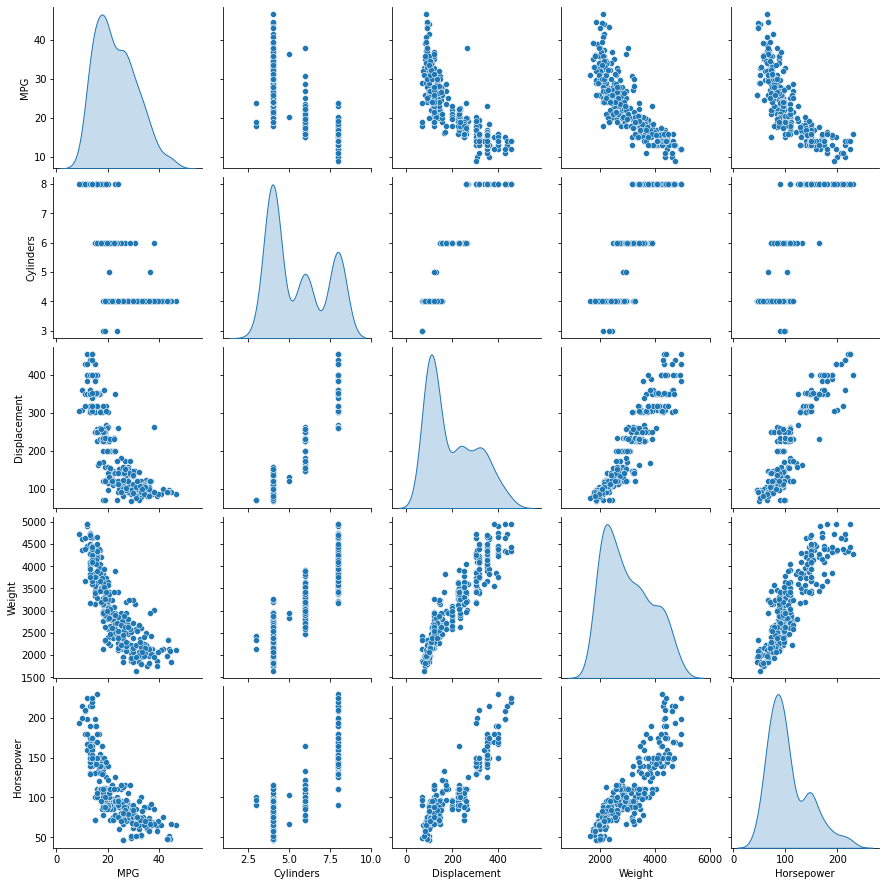

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight', 'Horsepower']], diag_kind='kde')

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [ ]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
79,4,96.0,69.0,2189.0,18.0,72,2
276,4,121.0,115.0,2795.0,15.7,78,2
248,4,91.0,60.0,1800.0,16.4,78,3
56,4,91.0,70.0,1955.0,20.5,71,1
393,4,140.0,86.0,2790.0,15.6,82,1
...,...,...,...,...,...,...,...
218,4,79.0,58.0,1825.0,18.6,77,2
281,6,200.0,85.0,2990.0,18.2,79,1
342,4,135.0,84.0,2385.0,12.9,81,1
238,4,98.0,83.0,2075.0,15.9,77,1


In [ ]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.153822,5.531847,197.855096,105.971338,3005.745223,15.510828,75.910828,1.579618
std,7.861854,1.729449,106.501896,39.636557,859.060925,2.803560,3.688989,0.808322
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,76.000000,2231.000000,13.625000,73.000000,1.000000
50%,22.000000,4.000000,151.000000,95.000000,2831.500000,15.500000,76.000000,1.000000
75%,28.075000,8.000000,302.000000,130.000000,3641.750000,17.000000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4955.000000,24.800000,82.000000,3.000000


In [ ]:

train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.153822,7.861854
Cylinders,5.531847,1.729449
Displacement,197.855096,106.501896
Horsepower,105.971338,39.636557
Weight,3005.745223,859.060925
Acceleration,15.510828,2.803560
Model Year,75.910828,3.688989
Origin,1.579618,0.808322


In [ ]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [ ]:
first = np.array(train_features[:1])
print('First Example:', first)
print('Normalized:', normalizer(first).numpy())

First Example: [[4.000e+00 9.600e+01 6.900e+01 2.189e+03 1.800e+01 7.200e+01 2.000e+00]]
Normalized: [[-0.88715637 -0.9578955  -0.9342477  -0.95225996  0.8892784  -1.0618277
   0.5208973 ]]


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1)
])


model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='mean_absolute_error')

In [ ]:
history = model.fit(
    train_features, train_labels, 
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 64ms/step - loss: 1685706.5000 - val_loss: 6.5533
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 6.6151 - val_loss: 8.7534
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 6.7871 - val_loss: 6.9445
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 7.0008 - val_loss: 6.7803
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 6.6629 - val_loss: 7.6898
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 6.8433 - val_loss: 7.4750
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 6.7580 - val_loss: 7.4186
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 6.8472 - val_loss: 7.4735
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 7.1606 - val_loss: 6.5486
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 6.7630 - val_loss: 8.6949
Epoch 11/100
8/8 [====

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

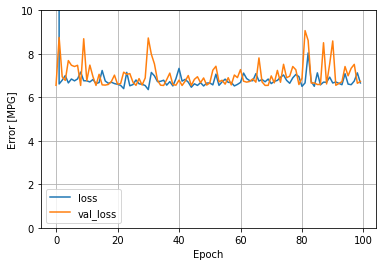

In [ ]:
plot_loss(history)

In [ ]:
model.evaluate(test_features, test_labels)

3/3 [==============================] - 0s 4ms/step - loss: 6.4957


6.495657920837402

In [ ]:
test_example = test_features[:1]
test_example_label = test_labels[:1]

In [ ]:
model.predict(test_example)

array([[22.59104]], dtype=float32)

In [ ]:
test_example_label

1    15.0
Name: MPG, dtype: float64